In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib as plt
from wordcloud import WordCloud
from tqdm.autonotebook import tqdm
tqdm.pandas()

# NLTK
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

In [49]:
ldamodelf = models.ldamodel.LdaModel(corpusf,
                                    id2word = dictionaryf, # connect each word to its "spot" in the dictionary
                                    num_topics = 10, # hyperparameter T for number of topics
                                    passes = 5, # similar to epochs, how many times do we iterate through the data untel convergence accures
                                    minimum_probability = 0.01
                                    
                                    ) # only including topics that meet some probability threshold

In [50]:
pyLDAvis.gensim.prepare(ldamodelf, corpusf, dictionaryf)

/Users/LujFel/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.129234  0.027718       1        1  13.666688
4      0.157446  0.117777       2        1  11.956269
9      0.152888  0.166117       3        1  11.383237
3     -0.229534  0.062832       4        1  11.196901
2     -0.253085  0.031164       5        1   9.888041
7      0.022942  0.048849       6        1   8.618094
6     -0.216036 -0.044751       7        1   8.557684
0      0.124738  0.071175       8        1   8.537757
1     -0.001163 -0.081353       9        1   8.523676
5      0.112570 -0.399529      10        1   7.671650, topic_info=     Category          Freq      Term         Total  loglift  logprob
term                                                                 
1055  Default  46523.000000       via  46523.000000  30.0000  30.0000
620   Default  27314.000000     saudi  27314.000000  29.0000  29.0000
109   Default  21524.000000       one  21524.000000  28.0000  28.0000
8373  Default  18425.000000     zawya  18425.000000  27.0000  27.0000
47    Default  14363.000000     peopl  14363.000000  26.0000  26.0000
178   Default  11630.000000     today  11630.000000  25.0000  25.0000
2361  Default  11813.000000    follow  11813.000000  24.0000  24.0000
365   Default  15650.000000       new  15650.000000  23.0000  23.0000
194   Default   9761.000000      love   9761.000000  22.0000  22.0000
894   Default   9163.000000       oil   9163.000000  21.0000  21.0000
2969  Default   9500.000000      iran   9500.000000  20.0000  20.0000
41    Default  10608.000000      good  10608.000000  19.0000  19.0000
358   Default  12371.000000      dont  12371.000000  18.0000  18.0000
1380  Default   7841.000000     qatar   7841.000000  17.0000  17.0000
3     Default   8183.000000      look   8183.000000  16.0000  16.0000
36    Default   8321.000000     thank   8321.000000  15.0000  15.0000
530   Default  10183.000000       uae  10183.000000  14.0000  14.0000
359   Default  10945.000000      know  10945.000000  13.0000  13.0000
590   Default   7807.000000     check   7807.000000  12.0000  12.0000
64    Default  14829.000000      like  14829.000000  11.0000  11.0000
427   Default   6850.000000      life   6850.000000  10.0000  10.0000
1467  Default   7910.000000    arabia   7910.000000   9.0000   9.0000
419   Default  10148.000000     would  10148.000000   8.0000   8.0000
217   Default   7385.000000    person   7385.000000   7.0000   7.0000
137   Default   9644.000000     think   9644.000000   6.0000   6.0000
82    Default  10860.000000      year  10860.000000   5.0000   5.0000
1522  Default   6288.000000     thing   6288.000000   4.0000   4.0000
11    Default  10221.000000       day  10221.000000   3.0000   3.0000
75    Default  13437.000000       get  13437.000000   2.0000   2.0000
254   Default   9258.000000     dubai   9258.000000   1.0000   1.0000
...       ...           ...       ...           ...      ...      ...
3379  Topic10   4707.418457   automat   4708.407227   2.5674  -3.9265
1317  Topic10   4104.618652    bpolit   4105.608398   2.5674  -4.0635
1132  Topic10   3851.889404    youtub   3852.878174   2.5674  -4.1270
4633  Topic10   3685.134521      stat   3686.123535   2.5674  -4.1713
195   Topic10   3087.294189    riyadh   3088.283203   2.5673  -4.3483
323   Topic10   2711.896729     stori   2712.885742   2.5673  -4.4779
587   Topic10   2598.403564       top   2599.392578   2.5673  -4.5207
1286  Topic10   2500.325684      nasa   2501.314941   2.5672  -4.5592
1465  Topic10   2025.502563    turkey   2026.491577   2.5672  -4.7698
1896  Topic10   1684.727417   increas   1685.716431   2.5671  -4.9540
2195  Topic10   1638.918335      govt   1639.907349   2.5670  -4.9816
1076  Topic10   1566.979614       wsj   1567.968506   2.5670  -5.0264
4760  Topic10   1509.594116   channel   1510.583008   2.5670  -5.0638
466   Topic10   1418.149902     innov   1419.138794   2.5669  -5.1262
1240  Topic10   134

In [312]:
ldamodelf.save('topicf.model')

In [314]:
pyLDAvis.save_html(pyLDAvis.gensim.prepare(ldamodelf, corpusf, dictionaryf),'topic_viz.html')

/Users/LujFel/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


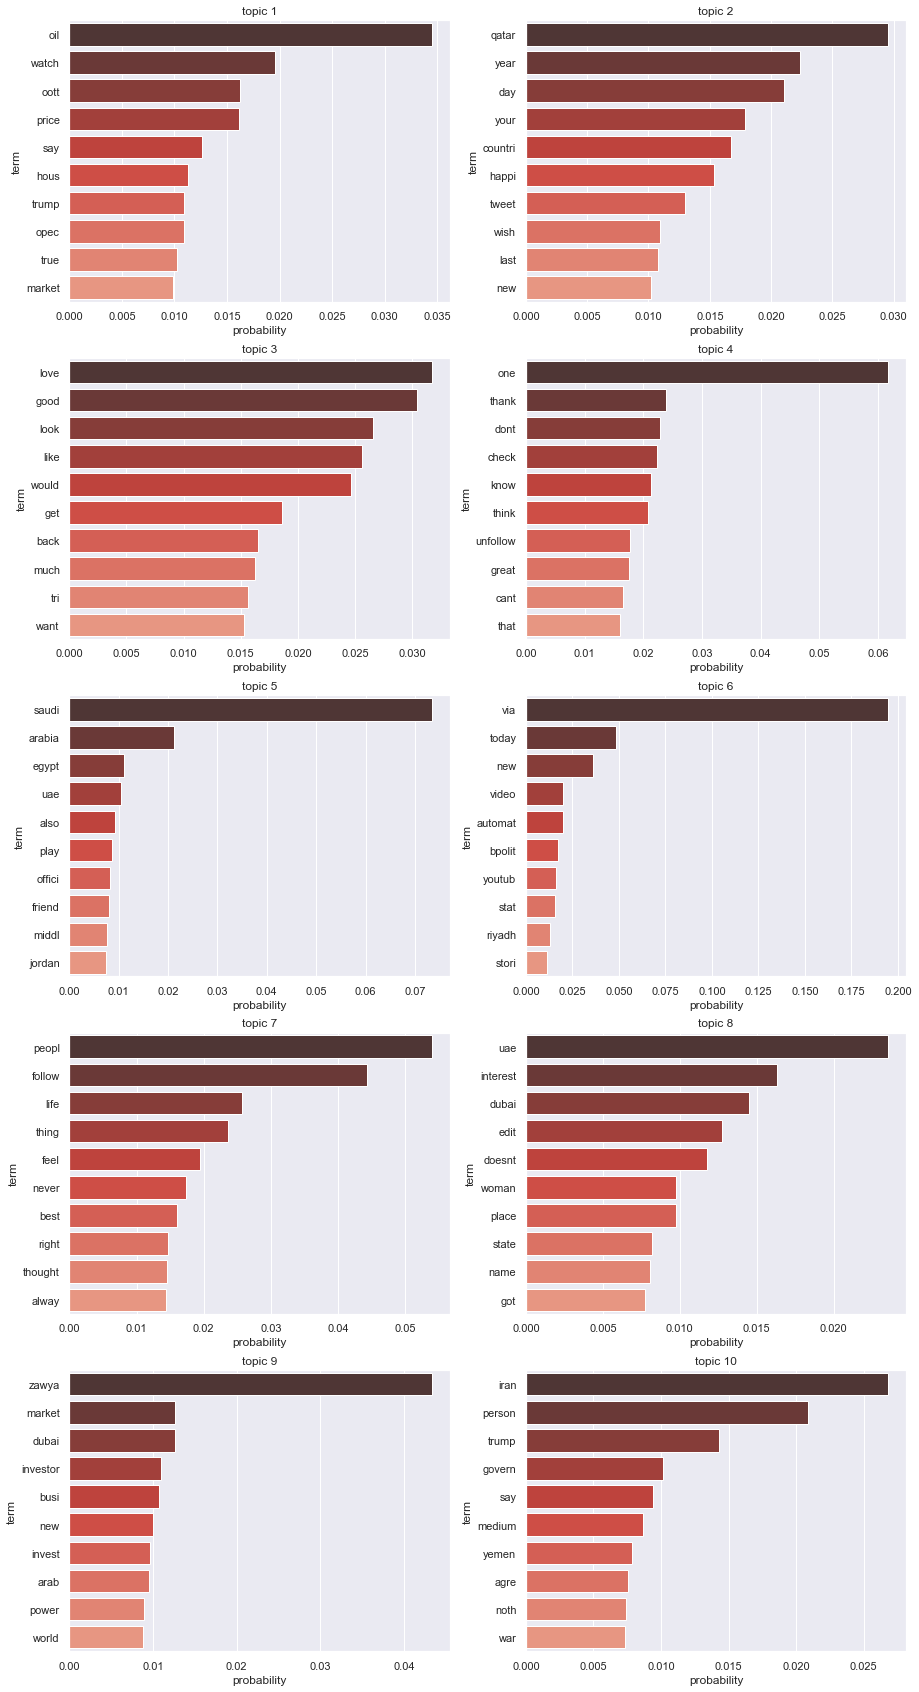

In [313]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(ldamodelf.show_topic(i), columns=['term','prob']).set_index('term')
#     df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()

In [51]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodelf, texts=ff.tweet.values, dictionary=dictionaryf, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3091985947502065


In [315]:
from wordcloud import WordCloud

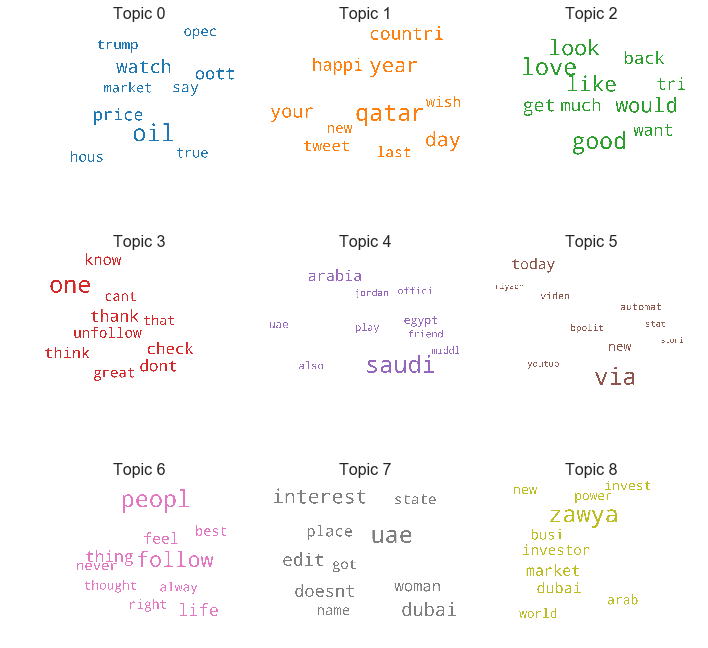

In [323]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodelf.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [52]:
dictionary = corpora.Dictionary(af.tweet.values)
corpus = [dictionary.doc2bow(text) for text in af.tweet.values]
len(corpus[0])

1051

# Case Example Prediction Set Up

In [ ]:
x = ''' #PIF contributes to the development of Saudi Arabias economy by investing in
diversified sectors, geographies and asset classes, forming strategic partnerships and 
launching major initiatives that maximize sustainable returns in line with the goals of #SaudiVision2030. '''

In [ ]:
#pre-preocessing
x = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic.twitter.com\S+))','',x)
print(x)
x = " ".join(x.lower() for x in x.split())
print(x)
x = x.replace('[^\w\s]','')
print(x)
x = " ".join(x for x in x.split() if x not in stop)
print(x)
x = x.replace("[^a-zA-Z#]", " ")
print(x)

x = tokenizer.tokenize(x)
print(x)

x = [get_lemma2(a) for a in x]
print(x)

x = [ w for w in x if len(w) > 2]
print(x)
x = [porter_stemmer.stem(word) for word in x]
print(x)

In [ ]:
c = ldamodel.get_document_topics([dictionary.doc2bow(x)], minimum_probability=None)

In [251]:
v = dict(c[0])

In [258]:
v

{0: 0.04695127,
 1: 0.045884695,
 2: 0.04587885,
 3: 0.099879734,
 4: 0.3584619,
 5: 0.049083132,
 6: 0.045889385,
 7: 0.113820486,
 8: 0.12594701,
 9: 0.06820351}

In [252]:
type(v)

dict

In [271]:
list(v.values())

[0.04695127,
 0.045884695,
 0.04587885,
 0.099879734,
 0.3584619,
 0.049083132,
 0.045889385,
 0.113820486,
 0.12594701,
 0.06820351]

In [272]:
predict_f = pd.DataFrame([list(v.values())], columns=v.keys())

In [273]:
predict_f

,0,1,2,3,4,5,6,7,8,9
0,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204


In [274]:
df.DayOfWeek.value_counts()

2    59244
1    57500
3    57228
0    54546
4    52985
6    48746
5    46700
Name: DayOfWeek, dtype: int64

In [275]:
df.Month.value_counts()

1     37890
12    35113
11    35068
10    34358
7     32336
8     32179
9     30833
6     30823
5     30148
4     27557
3     26662
2     23982
Name: Month, dtype: int64

In [277]:
df.Hour.value_counts()

17    20930
16    20858
19    20782
18    20546
15    20435
20    19861
10    19537
14    19536
13    18838
21    18192
12    17998
11    17644
9     16856
8     15352
7     14235
22    14232
6     13482
5     12336
4     11824
23    10508
3      9335
0      8289
2      7972
1      7371
Name: Hour, dtype: int64

In [283]:
userlist = list(df.username.unique())

In [285]:
userlist[0]

'10mgp'

In [289]:
values  = predict_f.values.tolist()[0]
for i,value in enumerate(values):
    test_date[i] = value
test_date.head()

,month,day,hour,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204
0,1,0,1,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204
0,1,0,2,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204
0,1,0,3,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204
0,1,0,4,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204


In [290]:
test_date["user"] = userlist[0]

In [291]:
Data_set = test_date
for user in userlist:
    test_date["user"] = user
    Data_set = pd.concat([Data_set, test_date])

Data_set.head()

,month,day,hour,0,1,2,3,4,5,6,7,8,9,user
0,1,0,0,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
0,1,0,1,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
0,1,0,2,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
0,1,0,3,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
0,1,0,4,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp


In [292]:
Data_set.shape

(866880, 14)

In [295]:
Data_set.drop_duplicates(inplace=True)

In [296]:
Data_set.shape

(864864, 14)

In [279]:
test_date = pd.DataFrame(columns=["month","day","hour"])
for month in range(1,13):
    for day in range(7):
        for hour in range(24):
                test_date = pd.concat([test_date, pd.DataFrame([[month,day,hour]], columns=["month","day","hour"])])
test_date

,month,day,hour
0,1,0,0
0,1,0,1
0,1,0,2
0,1,0,3
0,1,0,4
0,1,0,5
0,1,0,6
0,1,0,7
0,1,0,8
0,1,0,9


In [298]:
Data_set.reset_index(inplace=True, drop=True)

In [299]:
Data_set.head()

,month,day,hour,0,1,2,3,4,5,6,7,8,9,user
0,1,0,0,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
1,1,0,1,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
2,1,0,2,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
3,1,0,3,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
4,1,0,4,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp


In [301]:
list(Data_set.columns)

['month', 'day', 'hour', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'user']

In [302]:
Data_set.columns = ['Month', 'DayOfWeek', 'Hour', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'username']

In [303]:
Data_set.head()

,Month,DayOfWeek,Hour,0,1,2,3,4,5,6,7,8,9,username
0,1,0,0,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
1,1,0,1,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
2,1,0,2,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
3,1,0,3,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
4,1,0,4,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp


In [307]:
Data_set.to_csv('Predicting_Set.csv')

In [308]:
pf = pd.read_csv('Predicting_Set.csv')

In [309]:
pf.head()

,Unnamed: 0,Month,DayOfWeek,Hour,0,1,2,3,4,5,6,7,8,9,username
0,0,1,0,0,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
1,1,1,0,1,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
2,2,1,0,2,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
3,3,1,0,3,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp
4,4,1,0,4,0.046951,0.045885,0.045879,0.09988,0.358462,0.049083,0.045889,0.11382,0.125947,0.068204,10mgp


In [310]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864864 entries, 0 to 864863
Data columns (total 15 columns):
Unnamed: 0    864864 non-null int64
Month         864864 non-null int64
DayOfWeek     864864 non-null int64
Hour          864864 non-null int64
0             864864 non-null float64
1             864864 non-null float64
2             864864 non-null float64
3             864864 non-null float64
4             864864 non-null float64
5             864864 non-null float64
6             864864 non-null float64
7             864864 non-null float64
8             864864 non-null float64
9             864864 non-null float64
username      864864 non-null object
dtypes: float64(10), int64(4), object(1)
memory usage: 99.0+ MB
